# Analysis of Data from the Titanic

## Overview

In this analysis I'll analyse data on passengers from the Titanic.<br>
I'll start by importing and cleaning the data, before going on to Exploratory Data Analysis, where I'll use visualisations, statistics and hypothesis tests to derive insights from the data.<br>
In particular I'm interested in the impact of different demographic factors on survival rate.

## Importing and cleaning the data

In [199]:
# Import required packages and download the dataset
import pandas as pd
titanic = pd.read_csv('Titanic.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
# Drop unneccessary columns
titanic = titanic.drop(columns=['Cabin', 'SibSp', 'Parch', 'Ticket'])

In [201]:
# Check for missing values
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

There are 177 missing values in the Age column, and 2 missing values in the Embarked column. <br>
Since this is only a small proportion of the dataset, and we don't have enough information to fill in the missing values, we'll drop the rows with missing values.

In [202]:
# Drop missing values
titanic = titanic.dropna()

# Check again for missing values
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [203]:
# Check data types look reasonable
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

These data types aren't quite right. We want the categorical variables such as Sex and Embarked to have dtype 'category', we want Age to be an integer as that's how it was recorded,
and we want Survived to be Boolean because it's effectively a True/False variable depicting whether the passenger survived.

In [204]:
# Change the data types
titanic = titanic.astype({'Survived': 'bool', 'Sex': 'category', 'Age': 'int64', 'Embarked': 'category'}) 

In [205]:
# Check everything looks reasonable
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    bool    
 1   Pclass    712 non-null    int64   
 2   Sex       712 non-null    category
 3   Age       712 non-null    int64   
 4   Fare      712 non-null    float64 
 5   Embarked  712 non-null    category
dtypes: bool(1), category(2), float64(1), int64(2)
memory usage: 24.5 KB


We can see that the data types agree to what we specified, and there are no more missing values.

In [206]:
# Check statistics look reasonable
titanic.describe()

,Pclass,Age,Fare
count,712.000000,712.000000,712.000000
mean,2.240169,29.622191,34.567251
std,0.836854,14.502891,52.938648
min,1.000000,0.000000,0.000000
25%,1.000000,20.000000,8.050000
50%,2.000000,28.000000,15.645850
75%,3.000000,38.000000,33.000000
max,3.000000,80.000000,512.329200


Most of the above statistics look reasonable and in line with our expectations.<br>
Initially it looks a little odd that some passengers have a Fare of 0. However, research shows that a few passengers did get their tickets free, and we can check below that this
only affects a small portion of our population.

In [207]:
# Calculate and print the proportion of passengers with a fare of 0
print(round(100*len(titanic[titanic['Fare']==0])/len(titanic),1), "%")

1.0 %


Finally, let's add in a new column, 'Age Rounded', to help group passengers together for later analysis.<br>
This column rounds passengers ages to the nearest 10.

In [208]:
# Create new column and define the data type
titanic['Age Rounded'] = round(titanic['Age']/10)*10
titanic['Age Rounded'] = titanic['Age Rounded'].astype('int')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age Rounded
PassengerId,,,,,,,
1,False,3,male,22,7.2500,S,20
2,True,1,female,38,71.2833,C,40
3,True,3,female,26,7.9250,S,30
4,True,1,female,35,53.1000,S,40
5,False,3,male,35,8.0500,S,40


## Exploratory Data Analysis

In [209]:
# Import the required visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

#### One variable plots

Let's visualise the distribution of each variable to see what insights we can attain.

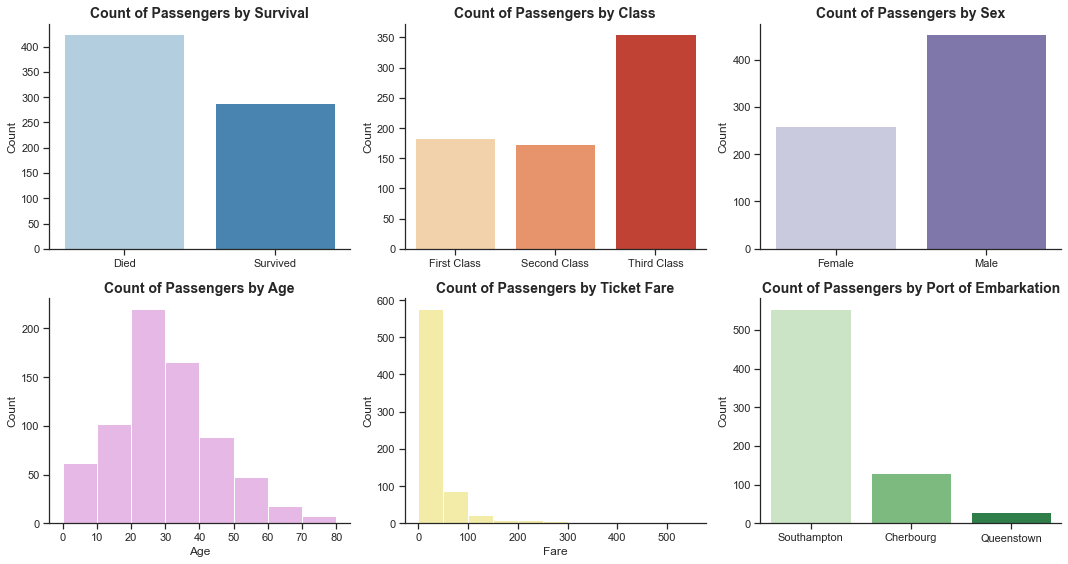

In [231]:
# Generate distribution plots for each variable (countplots for discrete variables; histograms for continuous variables)

# Set up the visualisation environment
sns.set_style('ticks')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
sns.despine()

# Generate the plots
g1 = sns.countplot(data=titanic, x='Survived', palette='Blues', ax=axs[0,0])
g2 = sns.countplot(data=titanic, x='Pclass', palette='OrRd', ax=axs[0,1]) 
g3 = sns.countplot(data=titanic, x='Sex', palette='Purples', ax=axs[0,2])
g4 = sns.histplot(titanic['Age'], bins= [0,10,20,30,40,50,60,70,80], color='plum', ax=axs[1,0]) 
g5 = sns.histplot(titanic['Fare'], bins=[0,50,100,150,200,250,300,350,400,450,500,550], color='khaki', ax=axs[1,1]) 
g6 = sns.countplot(data=titanic, x='Embarked', palette='Greens', order=['S', 'C', 'Q'], ax=axs[1,2])

# Set titles for each plot
g1.set_title('Count of Passengers by Survival', fontweight='bold', fontsize=14)
g2.set_title('Count of Passengers by Class', fontweight='bold', fontsize=14)
g3.set_title('Count of Passengers by Sex', fontweight='bold', fontsize=14)
g4.set_title('Count of Passengers by Age', fontweight='bold', fontsize=14)
g5.set_title('Count of Passengers by Ticket Fare', fontweight='bold', fontsize=14)
g6.set_title('Count of Passengers by Port of Embarkation', fontweight='bold', fontsize=14)

# Set labels for the x-axis and y-axis
for i in [g1, g2, g3, g6]:
    i.set(xlabel='', ylabel='Count')
g4.set(xlabel='Age', ylabel='Count')
g5.set(xlabel='Fare', ylabel='Count')

# Set tick labels
g1.set_xticklabels(['Died', 'Survived'])
g2.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
g3.set_xticklabels(['Female', 'Male'])
g6.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Display the plots
plt.tight_layout()
plt.show()

**Conclusions:**
- More than half of the passengers sampled died as a result of the disaster.
- Most passengers were in 3rd class. This seems reasonable given the distribution of wealth at the time.
- About two thirds of the passengers were male. This is perhaps because men were more financially independent than women in those times, so were more able to purchase a ticket for themselves, whereas women may have had to rely on travelling with their husband.
- Most passengers were relatively young, with the largest age bracket being those in their 20s.
- The fare ranged quite wildly, but most tickets were less than £50.
- The majority embarked at Southampton (England), some embarked at Cherbourg (France), and very few embarked at Queenstown (Ireland).

#### Two variable plots

Now let's visualise the impact of the other variables on survival rate using a two-variable bar plot.<br>
We know from historical records that women and children from the first and second classes were given priority to board the lifeboats, so we would expect these demographics to have a higher chance of survival.

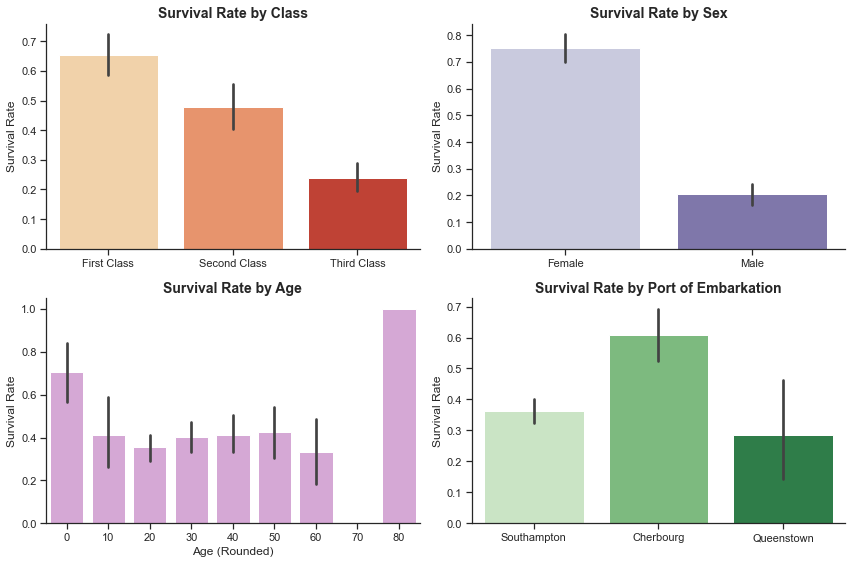

In [230]:
# Generate bar plots of survival rate against the other variables

# Set up the visualisation environment
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.despine()

# Generate the plots
g1 = sns.barplot(data=titanic, x='Pclass', y='Survived', palette='OrRd', ax=axs[0,0]) 
g2 = sns.barplot(data=titanic, x='Sex', y='Survived', palette='Purples', ax=axs[0,1]) 
g3 = sns.barplot(data=titanic, x='Age Rounded', y='Survived', color='plum', ax=axs[1,0]) 
g4 = sns.barplot(data=titanic, x='Embarked', y='Survived', palette='Greens', order=['S','C','Q'], ax=axs[1,1]) 

# Set titles for each plot
g1.set_title('Survival Rate by Class', fontweight='bold', fontsize=14)
g2.set_title('Survival Rate by Sex', fontweight='bold', fontsize=14)
g3.set_title('Survival Rate by Age', fontweight='bold', fontsize=14)
g4.set_title('Survival Rate by Port of Embarkation', fontweight='bold', fontsize=14)

# Set labels for the x-axis and y-axis
for i in [g1, g2, g4]:
    i.set(xlabel='', ylabel='Survival Rate')
g3.set(xlabel='Age (Rounded)', ylabel='Survival Rate')

# Set tick labels
g1.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
g2.set_xticklabels(['Female', 'Male'])
g4.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Display the plots
plt.tight_layout()
plt.show()

**Conclusions:**
- As expected, passenger class appears to be correlated to survival rate, with passengers from higher classes apparently more likely to survive. Moreover the 95% confidence intervals (displayed as vertical lines on the graph) do not overlap, which suggests that the difference in mean survival rate between passenger classes is statistically significant.
- Gender also appears to be correlated to survival rate, with women apparently much more likely to survive than men. Again this is in line with our expectations, and we can infer statistical significance from the disjoint positioning of the confidence intervals.
- Age does not have such a clear correlation with survival rate, although infants do seem to have a higher chance of survival, which is in line with the prioritisation of women and children first. At first glance it also looks as though the elderly have a much higher survival rate, but this figure may not be representative as there was only one passenger in the '80' age bracket.
- Surprisingly, port of embarkation also appears to be correlated with survival rate. It doesn't make sense that where a passenger boarded should affect their chance of survival, so let's dig a little deeper and see if there could be a third variable linking both embarkation port and chance of survival. 

#### Further analysis of survival rate by port of embarkation

In [227]:
# Create subsets of the titanic dataset corresponding to where the passengers embarked
Southampton = titanic[titanic['Embarked']=='S']
Cherbourg = titanic[titanic['Embarked']=='C']
Queenstown = titanic[titanic['Embarked']=='Q']

# Print the proportion of female passengers and the average passenger class for each port
for key, value in {'Southampton':Southampton, 'Cherbourg':Cherbourg, 'Queenstown':Queenstown}.items():
    print("Passengers who embarked at ", key,
    "\nProportion that were female: ", round((value['Sex']=='female').sum() / len(value),2),
    "\nAverage passenger class: ", round(value['Pclass'].mean(),2),"\n")

Passengers who embarked at  Southampton 
Proportion that were female:  0.34 
Average passenger class:  2.33 

Passengers who embarked at  Cherbourg 
Proportion that were female:  0.47 
Average passenger class:  1.75 

Passengers who embarked at  Queenstown 
Proportion that were female:  0.43 
Average passenger class:  2.79 



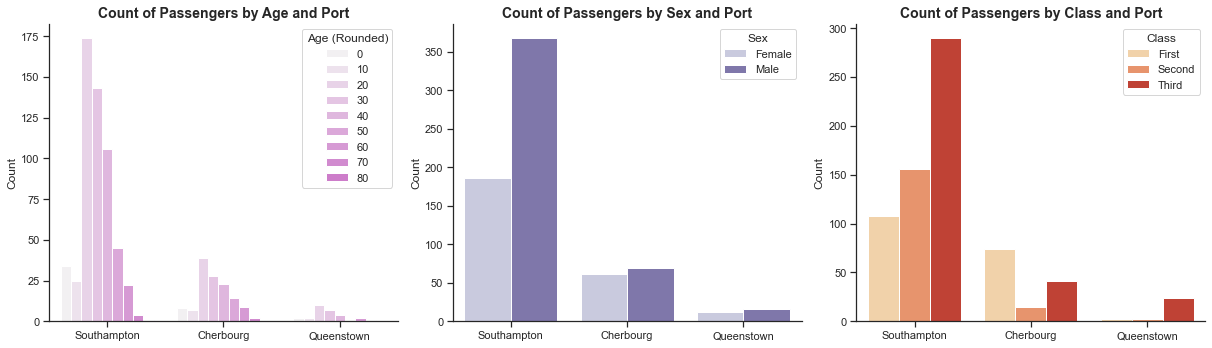

In [236]:
# Generate count plots of sex and passenger class by port

# Set up the visualisation environment
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
sns.despine()

# Generate the plots
g1 = sns.countplot(data=titanic, x='Embarked', hue='Age Rounded', color='orchid', order=['S','C','Q'], ax=axs[0]) 
g2 = sns.countplot(data=titanic, x='Embarked', hue='Sex', palette='Purples', order=['S','C','Q'], ax=axs[1]) 
g3 = sns.countplot(data=titanic, x='Embarked', hue='Pclass', palette='OrRd', order=['S','C','Q'], ax=axs[2]) 

# Set titles for each plot
g1.set_title('Count of Passengers by Age and Port', fontweight='bold', fontsize=14)
g2.set_title('Count of Passengers by Sex and Port', fontweight='bold', fontsize=14)
g3.set_title('Count of Passengers by Class and Port', fontweight='bold', fontsize=14)

# Set labels for the x-axis and y-axis
for i in [g1, g2, g3]:
    i.set(xlabel='', ylabel='Count')
    i.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

# Set legends
g1.legend(title='Age (Rounded)', loc='upper right')
g2.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
g3.legend(title='Class', loc='upper right', labels=['First','Second','Third'])

# Display the plots
plt.tight_layout()
plt.show()

From the data and the visualisations above, we can draw the following conclusions.
- The distribution of age of passengers is fairly consistent across the embarkation ports.
- The proportion of women is also fairly similar between Cherbourg and Queenstown, although there were fewer women on average embarking at Southampton, which may have lowered the survival rate for those embarking at Southampton.
- It is passenger class which appears to be the key variable here. It is much lower on average for Queenstown (averaging 2.8), whereas much higher for Cherbourg (averaging 1.7). This suggests that the apparent link between embarkation port and survival rate may actually be a link by association with a third variable, passenger class.

#### Hypothesis testing

We saw earlier from the confidence intervals on the bar plots that the mean survival rate appears to differ with statistical significance depending on sex and passenger class.<br>
Now let's use hypothesis testing to conclude just how significant this difference is. We'll start by looking at sex.<br>

In hypothesis testing, we typically have two hypotheses: the *null hypothesis* and the *alternative hypothesis*.<br>
The null hypothesis states that there is no difference between the two groups that we are evaluating. So in this case the null hypothesis is that the survival rate is the same for men and women, and any apparent variance is down to chance. The alternative hypothesis states that there is a difference between the groups, i.e. a different survival rate for men and women.<br>

We start by assuming the null hypothesis is true, and use the *p-value* as the basis for rejecting this null hypothesis.<br>
The p-value is the probability of obtaining results as extreme as these, assuming that our null hypothesis is correct. The smaller the p-value, the more likely we are to favour the alternative hypothesis.<br>
If the p-value is smaller than the critical value *alpha* (commonly chosen to be 0.05), we reject the null hypothesis, as this suggests that there is a less than 5% chance that our null hypothesis is correct.

In [214]:
# Perfom a hypothesis test evaluating whether the survival rate differs for men and women
from scipy import stats
women = titanic[titanic['Sex']=='female']['Survived']
men = titanic[titanic['Sex']=='male']['Survived']
stats.ttest_ind(women, men)

Ttest_indResult(statistic=16.95138209331607, pvalue=2.2428516419834136e-54)

The p-value above is incredibly small, at 2.24e-54. This is highly statistically significant, so we can safely reject the null hypothesis that men and women have the same survival rate, and conclude that women had a higher chance of survival than men.

Now let's perform a similar test but this time looking at passenger class.<br>
Hypothesis testing typically compares just two groups, so we will compare each pair of classes individually.

In [215]:
# Divide the data by passenger class
first_class = titanic[titanic['Pclass']==1]['Survived']
second_class = titanic[titanic['Pclass']==2]['Survived']
third_class = titanic[titanic['Pclass']==3]['Survived']

# Perfom a hypothesis test evaluating whether the survival rate differs for first class and second class passengers
result1 = stats.ttest_ind(first_class, second_class)
print(result1)

# Perfom a hypothesis test evaluating whether the survival rate differs for second class and third class passengers
result2 = stats.ttest_ind(second_class, third_class)
print(result2)

# Perfom a hypothesis test evaluating whether the survival rate differs for first class and third class passengers
result2 = stats.ttest_ind(first_class, third_class)
print(result2)

Ttest_indResult(statistic=3.328599229057307, pvalue=0.0009643071074406221)
Ttest_indResult(statistic=5.724810584268534, pvalue=1.741869407625977e-08)
Ttest_indResult(statistic=10.208107681930317, pvalue=1.7643723928503704e-22)


None of the p-values above are as small as the p-value comparing men to women, which implies that sex had a more significant impact on survival rate than passenger class.<br>
However the p-values are still all very small, with the largest one (comparing first and second class) being less than 0.1%, being well below our alpha value of 5%.<br>
Therefore we can conclude that all three passenger classes had different survival rates, with the highest survival rate being for first class passengers, followed by second class, and finally third class.

#### Comparison of survival rates by demographic

Finally, let's look at the mean survival rates by demographic and deduce quantitatively how much it differs between the groups.

In [216]:
# Aggregate mean survival rates by sex
agg_sex = titanic.groupby('Sex')['Survived'].agg('mean')
print(agg_sex)

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


We can see that women had a survival rate of 75%, whereas for men it was only 21%.<br>
So women were around 3.6 times more likely to survive than men.

In [217]:
# Aggregate mean survival rates by passenger class
agg_class = titanic.groupby('Pclass')['Survived'].agg('mean')
print(agg_class)

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


We can see that first class had a survival rate of 65% on average, compared to 48% for second class passengers and 24% for third class passengers.<br>
So first class passengers were 2.7 times more likely to survive than third class passengers.

In [218]:
# Aggregate mean survival rates by both sex and passenger class
agg_sex_class = titanic.groupby(['Sex','Pclass'])['Survived'].agg('mean')
print(agg_sex_class)

Sex     Pclass
female  1         0.963855
        2         0.918919
        3         0.460784
male    1         0.396040
        2         0.151515
        3         0.150198
Name: Survived, dtype: float64


The above table gives more granular survival rates split out by both sex and passenger class.<br>
If we compare a first class woman (survival rate of 96%) with a third class man (survival rate of 15%), we can see that the first class woman would be 6.4 times more likely to survive.

## Conclusion

From the analysis above we can draw the following key conclusions:<br>

- Most passengers were relatively young, with the largest age bracket being those in their 20s. The survival rate appears to be higher for infants, which corresponds to children being given priority to board the lifeboats, but otherwise remains fairly similar between the rest of the age groups.
- There were almost twice as many men as women on board the Titanic. However, we have shown with statistical significance that being male resulted in a much lower chance of survival, at 75% for women versus 21% for men on average.
- The most popular passenger class was third class, and this contained about half of the passengers. Third class passengers had a lower chance of survival than both second class and first class passengers; for example, first class passengers were on average 2.7 times more likely to survive than third class passengers. Again, we have shown the difference in these mean survival rates to be statistically significant.
- Initially it appeared that the port at which a passenger embarked impacted their survival rate. However further analysis showed that this was likely a result of different demographics amongst passengers at each port
. For example, there were far more first class passengers at Cherbourg which increased its survival rate, whereas Southampton had fewer women which lowered its survival rate.